# Structural keys

Last time, we dealt with substructures and substructure-based filters. An extension of this concept is assembling a set of several such substructures, which can be searched as a whole against any molecule. As the normal substructure search returns binary results (True or False whether the substructure is contained within the given molecule), searching for a set of substructures within a given molecule produces a set of binary values. This set of binary values can be assembled into a binary vector, where each substructure is represented by a corresponding single bit within the vector. This defined set of substructures, called a structural key or substructure key, allows to characterize any given molecule by a binary vector. Structural keys are basically premade substructure searches that can be used to accelerate structure-related database queries, to quickly compare chemical structures to each other, and to map the feature space of a set of structures, among many other things. More details on structural keys and their applied use are available in the [daylight documentation](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html). Pretty much any computational method that works on binary vectors can be used on structural keys. Let's make a structural key of our own:

# What to do
 - Familiarize yourself with structural keys, if you haven't already in the lectures :) Some resources are Daylight Theory [here](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html) and Dalke's website [here](http://www.dalkescientific.com/writings/NBN/fingerprints.html)
 - Try to make a small structural key of your own, and characterize your set of ligands using this key
 - Have a look at the MACCS key, characterize both your structure set and DrugBank using MACCS key
 - Which MACCS bits are significantly more/less common in your ligand set in comparison to DrugBank?
 - What substructures do these bits [correspond to](https://github.com/openbabel/openbabel/blob/master/data/MACCS.txt)? Some additional materials on how to interpret SMARTS are [here](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html) and [here](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html).

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

RDKit WARNING: [17:55:55] Enabling RDKit 2019.09.3 jupyter extensions


In [8]:
# load your own set, and DrugBank :)
with open('DRD1_without_PAINS.txt', mode='r', encoding='utf-8') as txtfile:
    drd1_ligands = [Chem.MolFromSmiles(line) for line in txtfile]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

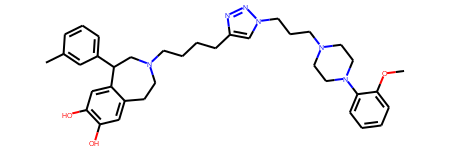

In [9]:
drd1_ligands[1]

# let's assemble a structural key from several substructures that were introduced in the previous exercise 5:

In [10]:
ethanol_pattern = Chem.MolFromSmarts('CCO')
propanol_pattern = Chem.MolFromSmarts('CCCO')
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
salicylic_acid_pattern = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')

So, we have a list of 4 substructures. We can search them all in a molecule, and produce a binary vector of 4 boolean values indicating which substructures are contained in the molecule. Let's characterize the structures in DrugBank using this amazing 4-bit key...

In [11]:
custom_key = [ethanol_pattern, propanol_pattern, cooh_pattern, salicylic_acid_pattern]
drd1_ligands_keys = [[m.HasSubstructMatch(substruct) for substruct in custom_key] for m in drd1_ligands]
len(drd1_ligands_keys), drd1_ligands_keys

(1018,
 [[False, False, False, False],
  [False, False, False, False],
  [True, True, True, False],
  [True, True, False, False],
  [False, False, False, False],
  [True, False, True, False],
  [True, True, False, False],
  [True, True, True, False],
  [True, True, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, True, False, False],
  [True, False, False, False],
  [True, False, False, Fal

As shown above, every molecule in our ligand set is represented by four bits that correspond to the presence of our four custom-defined substructures. This is of course a toy example, and structural keys are often hundreds of bits long. However, you don't have to manually define hundreds of substructures everytime you want to use structural keys. There are several already established sets of substructure features that you can use if you do not have a specific substructures in mind, and want a general characterization of your structure set. You can always extend those generic keys by whatever explicit groups you want to focus on.

# MACCS key
is an often-used structural key consisting of 166 defined [substructures of interest](https://github.com/openbabel/openbabel/blob/master/data/MACCS.txt), also implemented in RDKit. Let's make use of it to characterize our known ligands and the DrugBank database:

In [12]:
from rdkit.Chem import MACCSkeys

In [13]:
drd1_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drd1_ligands]
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]
drd1_maccs[0]

As with the custom substructure keys, each molecule is represented by a vector of binary values. In the RDKit implementation, the binary vector is implemented as an RDKit object has some nice [inbuilt binary vector operations](https://www.rdkit.org/docs/source/rdkit.DataStructs.cDataStructs.html):

In [14]:
drd1_maccs[0].GetNumBits() # get size of the vector

167

In [31]:
list(drd1_maccs[0].GetOnBits()) # get indices of the bits that are set to True within the fingerprint

[54,
 72,
 85,
 86,
 91,
 93,
 98,
 100,
 101,
 105,
 111,
 113,
 118,
 121,
 122,
 125,
 126,
 127,
 128,
 129,
 131,
 137,
 138,
 139,
 140,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

In [16]:
drd1_maccs[0].GetBit(25), drd1_maccs[0].GetBit(26) # getting individual bits

(False, False)

In [18]:
drd1_maccs[0].ToBitString() # write out the bit values in a string

'00000000000000000000000000000000000000000000000000000010000000000000000010000000000001100001010000101100010000010100001001100111110100000111100111111110110011111111110'

... among many other methods. For now, let's use the MACCS substructure keys to compare the relative amounts of substructures within our set of ligands and the DrugBank contents:

In [23]:
drd1_ligands_maccs_sums = [0]*drd1_maccs[0].GetNumBits() # a list of zeros of a given length
for key in drd1_maccs:
    for onbit in key.GetOnBits():
        drd1_ligands_maccs_sums[onbit] += 1
drd1_ligands_maccs_sums

[0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 15,
 0,
 1,
 20,
 1,
 4,
 5,
 1,
 5,
 14,
 2,
 81,
 0,
 4,
 18,
 35,
 32,
 55,
 70,
 8,
 37,
 11,
 13,
 0,
 44,
 47,
 17,
 4,
 75,
 64,
 112,
 8,
 21,
 17,
 98,
 59,
 9,
 18,
 34,
 49,
 18,
 60,
 122,
 72,
 67,
 154,
 177,
 63,
 21,
 218,
 64,
 87,
 63,
 77,
 214,
 26,
 75,
 293,
 224,
 84,
 10,
 76,
 37,
 46,
 348,
 71,
 183,
 358,
 138,
 225,
 51,
 264,
 253,
 143,
 212,
 359,
 184,
 509,
 436,
 243,
 165,
 338,
 340,
 378,
 276,
 412,
 143,
 335,
 428,
 392,
 500,
 186,
 537,
 542,
 130,
 173,
 363,
 568,
 230,
 269,
 341,
 287,
 327,
 560,
 330,
 448,
 167,
 360,
 395,
 349,
 598,
 71,
 450,
 617,
 559,
 351,
 187,
 551,
 405,
 651,
 516,
 557,
 112,
 451,
 413,
 319,
 298,
 269,
 335,
 716,
 455,
 519,
 368,
 312,
 493,
 651,
 525,
 687,
 526,
 602,
 613,
 533,
 634,
 467,
 659,
 673,
 597,
 567,
 716,
 761,
 778,
 765,
 756,
 820,
 833,
 935,
 930,
 966,
 44]

In [24]:
drugbank_maccs_sums = [0]*drugbank_maccs[0].GetNumBits() # a list of zeros of a given length
for key in drugbank_maccs:
    for onbit in key.GetOnBits():
        drugbank_maccs_sums[onbit] += 1
drugbank_maccs_sums

[0,
 0,
 0,
 30,
 0,
 1,
 11,
 24,
 99,
 46,
 22,
 117,
 30,
 60,
 33,
 11,
 52,
 77,
 68,
 282,
 7,
 21,
 181,
 212,
 435,
 564,
 224,
 96,
 149,
 726,
 126,
 21,
 431,
 481,
 153,
 44,
 625,
 521,
 1312,
 153,
 167,
 166,
 698,
 1198,
 266,
 246,
 194,
 455,
 869,
 713,
 646,
 601,
 553,
 1895,
 2246,
 663,
 178,
 1633,
 669,
 604,
 685,
 695,
 1753,
 207,
 624,
 2507,
 1118,
 782,
 133,
 1551,
 295,
 526,
 2196,
 755,
 1184,
 2092,
 797,
 2245,
 703,
 2263,
 2296,
 1228,
 2080,
 2781,
 2109,
 2498,
 1685,
 1310,
 1596,
 2474,
 3533,
 3342,
 2825,
 1650,
 1481,
 3191,
 3098,
 2783,
 3056,
 1145,
 2845,
 2775,
 1934,
 786,
 3210,
 2939,
 2665,
 1534,
 1732,
 2372,
 3113,
 3377,
 2725,
 2292,
 1097,
 1828,
 1896,
 3354,
 3347,
 924,
 3223,
 3762,
 2973,
 2791,
 2463,
 3448,
 2547,
 3821,
 2689,
 2850,
 1791,
 4638,
 3554,
 2717,
 1637,
 2198,
 3264,
 4492,
 2581,
 4291,
 3262,
 1352,
 4169,
 3821,
 2802,
 3698,
 4375,
 3396,
 3793,
 2507,
 3939,
 4407,
 3963,
 4550,
 4670,
 4851,
 5254

Since the sizes of our ligand set and the size of the DrugBank database are different, it might be a good idea to divide the raw incidence counts by the total set size, thus getting a number between 0 (never appears in any structure in a set) and 1 (always appears in every structure in a set) for both the ligand and the DrugBank set:

In [26]:
drd1_ligands_maccs_scaled = [x/len(drd1_maccs) for x in drd1_ligands_maccs_sums]
drd1_ligands_maccs_scaled

[0.0,
 0.0,
 0.0,
 0.0019646365422396855,
 0.0,
 0.0,
 0.0,
 0.0,
 0.014734774066797643,
 0.0,
 0.0009823182711198428,
 0.019646365422396856,
 0.0009823182711198428,
 0.003929273084479371,
 0.004911591355599214,
 0.0009823182711198428,
 0.004911591355599214,
 0.0137524557956778,
 0.0019646365422396855,
 0.07956777996070727,
 0.0,
 0.003929273084479371,
 0.01768172888015717,
 0.0343811394891945,
 0.03143418467583497,
 0.054027504911591355,
 0.068762278978389,
 0.007858546168958742,
 0.036345776031434185,
 0.010805500982318271,
 0.012770137524557957,
 0.0,
 0.043222003929273084,
 0.04616895874263261,
 0.01669941060903733,
 0.003929273084479371,
 0.07367387033398821,
 0.06286836935166994,
 0.1100196463654224,
 0.007858546168958742,
 0.0206286836935167,
 0.01669941060903733,
 0.0962671905697446,
 0.05795677799607073,
 0.008840864440078585,
 0.01768172888015717,
 0.03339882121807466,
 0.0481335952848723,
 0.01768172888015717,
 0.05893909626719057,
 0.11984282907662082,
 0.07072691552062868,

In [27]:
drugbank_maccs_scaled = [x/len(drugbank_maccs) for x in drugbank_maccs_sums]
drugbank_maccs_scaled

[0.0,
 0.0,
 0.0,
 0.004217629692113032,
 0.0,
 0.00014058765640376775,
 0.0015464642204414453,
 0.003374103753690426,
 0.013918177983973008,
 0.006467032194573317,
 0.0030929284408828905,
 0.016448755799240825,
 0.004217629692113032,
 0.008435259384226065,
 0.004639392661324336,
 0.0015464642204414453,
 0.007310558132995923,
 0.010825249543090117,
 0.009559960635456208,
 0.0396457191058625,
 0.0009841135948263741,
 0.0029523407844791226,
 0.025446365809081963,
 0.029804583157598763,
 0.06115563053563897,
 0.079291438211725,
 0.03149163503444397,
 0.013496415014761703,
 0.020947560804161394,
 0.10206663854913539,
 0.017714044706874738,
 0.0029523407844791226,
 0.0605932799100239,
 0.0676226627302123,
 0.021509911429776464,
 0.006185856881765781,
 0.08786728525235485,
 0.07324616898636299,
 0.1844510052017433,
 0.021509911429776464,
 0.023478138619429215,
 0.023337550963025446,
 0.0981301841698299,
 0.16842401237171375,
 0.03739631660340222,
 0.03458456347532687,
 0.027274005342330942,


So, we now have the occurrence ratio of each MACCS substructure within our set, and within DrugBank. We can now subtract the two and have a look at the differences:

In [28]:
# compute the differences, store bit numbers prior to sorting
drd1_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(drd1_ligands_maccs_scaled, drugbank_maccs_scaled))]
drd1_drugbank_differences

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, -0.002252993149873347),
 (4, 0.0),
 (5, -0.00014058765640376775),
 (6, -0.0015464642204414453),
 (7, -0.003374103753690426),
 (8, 0.0008165960828246353),
 (9, -0.006467032194573317),
 (10, -0.002110610169763048),
 (11, 0.003197609623156031),
 (12, -0.0032353114209931894),
 (13, -0.004505986299746694),
 (14, 0.00027219869427487844),
 (15, -0.0005641459493216025),
 (16, -0.0023989667773967093),
 (17, 0.0029272062525876833),
 (18, -0.007595324093216522),
 (19, 0.03992206085484477),
 (20, -0.0009841135948263741),
 (21, 0.0009769323000002484),
 (22, -0.007764636928924793),
 (23, 0.0045765563315957394),
 (24, -0.029721445859804005),
 (25, -0.02526393330013365),
 (26, 0.03727064394394503),
 (27, -0.005637868845802961),
 (28, 0.01539821522727279),
 (29, -0.09126113756681711),
 (30, -0.004943907182316781),
 (31, -0.0029523407844791226),
 (32, -0.01737127598075082),
 (33, -0.021453703987579682),
 (34, -0.004810500820739135),
 (35, -0.00225658379728641),
 (36

In [29]:
# let's sort the bits by the difference in MACCS incidence between our ligand set and the DrugBank database
drd1_drugbank_differences.sort(key=lambda x: x[1])
drd1_drugbank_differences

[(131, -0.2090200101256257),
 (90, -0.1627079778937649),
 (124, -0.16257388102306933),
 (151, -0.1608271691584378),
 (106, -0.1487329019584772),
 (102, -0.1441951522393073),
 (69, -0.1433952664771357),
 (54, -0.14188954229465015),
 (130, -0.14177284625372566),
 (136, -0.1298014896767506),
 (117, -0.1287019229574119),
 (92, -0.12604028651156723),
 (155, -0.12501626148972644),
 (95, -0.11953859075927559),
 (110, -0.11643129972874039),
 (84, -0.11575280546949507),
 (53, -0.11513659513268407),
 (43, -0.11046723437564303),
 (48, -0.104488944534717),
 (142, -0.10182703188522518),
 (91, -0.09852764121809121),
 (146, -0.09837158615744657),
 (140, -0.0971038114169882),
 (104, -0.09470484463959156),
 (77, -0.09459767762449398),
 (132, -0.0939510848864955),
 (139, -0.09343845091736902),
 (29, -0.09126113756681711),
 (82, -0.08417085184243023),
 (38, -0.07443135883632089),
 (80, -0.0742627365097305),
 (154, -0.07010034754704919),
 (133, -0.06861713396180713),
 (94, -0.0677388063638425),
 (65, -0.0

The MACCS bits that are least prevalent in our DRD1 ligand set compared to the DrugBank database contents are 131, 90, 124, 151, 106, 102, etc. These bits correspond to structural patterns [in the MACCS key definition](https://github.com/openbabel/openbabel/blob/master/data/MACCS.txt) "QH > 1" (heteroatom with one hydrogen), "QHAACH2A" (heteroatom with one H on it, anything, anything, CH2, anything), "QQ", "NH", "QA(Q)Q" (heteroatom, any atom connected to two other heteroatoms by any bond type) and "QO", respectively. The most prevalent MACCS bits in our set of MTOR ligands compared to the DrugBank baseline are 86, 93, 149, 145, 85 and 160. These correspond to structural patterns "CH2QCH2", "QCH3", "CH3 > 1", "6M ring > 1" (cycle consisting of any 6 atoms), "CN(C)C" and "CH3". Seems like DRD1 dataset has quite a few structures including some form of methyl group (compared to drugbank).

## Making my own structural key (+ characterizing DRD1)

In [57]:
amino_pattern = Chem.MolFromSmarts('*[NH2]')
two_joined_rings = Chem.MolFromSmarts("a12aaaa1aaaa2")
nitrogen_in_cycle = Chem.MolFromSmarts("[#7R]")
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
salicylic_acid_pattern = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')

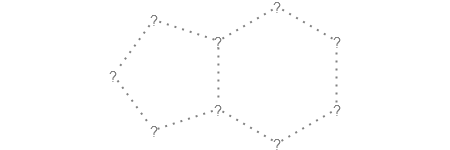

In [58]:
two_joined_rings

In [59]:
custom_key = [amino_pattern, nitrogen_in_cycle, cooh_pattern, two_joined_rings]
drd1_ligands_keys = [[m.HasSubstructMatch(substruct) for substruct in custom_key] for m in drd1_ligands]
len(drd1_ligands_keys), drd1_ligands_keys

(1018,
 [[False, True, False, False],
  [False, True, False, False],
  [False, True, True, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, True, False],
  [False, True, False, False],
  [False, False, True, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [False, False, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, True],
  [True, False, False, False],
  [False, True, False, False],
  [False, True, False, True],
  [False, True, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [False, True, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [False, True, False, True],
  [False, True, False, False],
  [False, True, False, True],
  [False, True, False, False],
  [False, False, False, False],
  